# Télécharger les données

Télécharger les images.

In [2]:
import os
import random
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import pandas as pd
import io
from keras import layers, models, losses
from PIL import Image
import requests as re



physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2025-01-30 18:37:16.502510: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-30 18:37:16.511304: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738258636.520827 1359734 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738258636.523701 1359734 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-30 18:37:16.534488: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
df_lapin = pd.read_csv('/home/shared/lapin.txt', sep='\t', on_bad_lines='skip')
df_lynx = pd.read_csv('/home/shared/lynx.txt', sep='\t', on_bad_lines='skip')
df_puma = pd.read_csv('/home/shared/puma.txt', sep='\t', on_bad_lines='skip')

df_animals = pd.concat([df_lapin, df_lynx, df_puma], axis=0)

# On utilise la fonction sample pour mélanger les données,
# l'argument frac=1 signfique que nous retournons toutes les lignes dans un ordre randomisé
df_animals.sample(frac=1)

,gbifID,type,format,identifier,references,title,description,source,audience,created,creator,contributor,publisher,license,rightsHolder
30446,4863712058,StillImage,image/jpeg,https://inaturalist-open-data.s3.amazonaws.com...,https://www.inaturalist.org/photos/378754850,NaN,NaN,NaN,NaN,2024-05-07T23:44:23Z,mssjordan,NaN,iNaturalist,http://creativecommons.org/licenses/by-nc/4.0/,mssjordan
44266,2823114068,StillImage,image/jpeg,https://inaturalist-open-data.s3.amazonaws.com...,https://www.inaturalist.org/photos/85339227,NaN,NaN,NaN,NaN,2020-07-19T18:44:07Z,karynkostiuk,NaN,iNaturalist,http://creativecommons.org/licenses/by-nc/4.0/,karynkostiuk
155407,2851106991,StillImage,image/jpeg,https://inaturalist-open-data.s3.amazonaws.com...,https://www.inaturalist.org/photos/89094368,NaN,NaN,NaN,NaN,2020-08-09T16:36:25Z,cubits,NaN,iNaturalist,http://creativecommons.org/licenses/by-nc/4.0/,cubits
45756,2992678936,StillImage,image/jpeg,https://inaturalist-open-data.s3.amazonaws.com...,https://www.inaturalist.org/photos/106226277,NaN,NaN,NaN,NaN,2020-11-29T01:19:22-08:00,W. Terry Hunefeld,NaN,iNaturalist,http://creativecommons.org/licenses/by-nc/4.0/,W. Terry Hunefeld
7870,4129759131,StillImage,image/jpeg,https://inaturalist-open-data.s3.amazonaws.com...,https://www.inaturalist.org/photos/285270836,NaN,NaN,NaN,NaN,2023-04-12T16:23:13-07:00,eharen,NaN,iNaturalist,http://creativecommons.org/licenses/by-nc/4.0/,eharen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13776,3385134324,StillImage,image/jpeg,https://inaturalist-open-data.s3.amazonaws.com...,https://www.inaturalist.org/photos/159778891,NaN,NaN,NaN,NaN,2021-09-25T13:31:16-07:00,Elio Giacone,NaN,iNaturalist,http://creativecommons.org/licenses/by-nc/4.0/,Elio Giacone
8953,3415895232,StillImage,image/jpeg,https://inaturalist-open-data.s3.amazonaws.com...,https://www.inaturalist.org/photos/167477198,NaN,NaN,NaN,NaN,2021-10-01T01:18:55Z,Doug Andrews,NaN,iNaturalist,http://creativecommons.org/licenses/by-nc/4.0/,Doug Andrews
361,1453077772,StillImage,image/jpeg,https://inaturalist-open-data.s3.amazonaws.com...,https://www.inaturalist.org/photos/354706,NaN,NaN,NaN,NaN,2013-05-30T02:22:50-07:00,Miguel Ordeñana,NaN,iNaturalist,http://creativecommons.org/licenses/by-nc/4.0/,Miguel Ordeñana
142117,4892082882,StillImage,image/jpeg,https://inaturalist-open-data.s3.amazonaws.com...,https://www.inaturalist.org/photos/391521261,NaN,NaN,NaN,NaN,2024-06-06T08:40:27-07:00,edwardrooks,NaN,iNaturalist,http://creativecommons.org/licenses/by-nc/4.0/,edwardrooks


In [8]:
def get_image(url, limit=350):

    folder_len = len(os.listdir('/home/shared/Random_animals_lynx'))

    # Limit the number of images to download
    if folder_len > limit:
        return
    
    len_0 = len(str(limit))
    
    try :

        response = re.get(url)
        img = Image.open(io.BytesIO(response.content))

        # Keep original.jpg
        img_name = url.split("/")[-1]
        # Add random number to the name
        img_name = img_name.split(".")[0] + str(folder_len).zfill(len_0) + '.' + img_name.split(".")[1]

        # Save the image to disk
        img.save(f'/home/shared/Random_animals_lynx/{img_name}')
    
    except Exception :
        return

df_lynx["identifier"].apply(lambda x: get_image(x))


KeyboardInterrupt: 

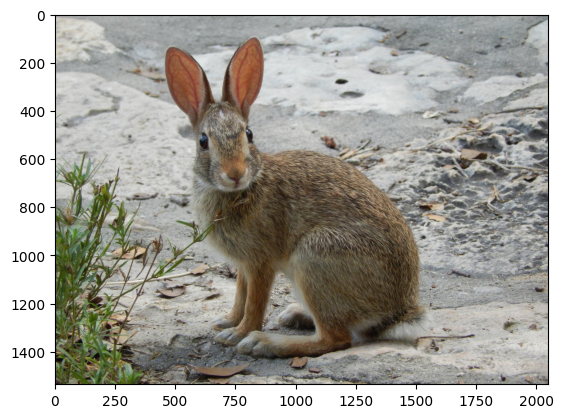

In [3]:
plt.imshow(Image.open("/home/shared/Random_animals/original366.jpg"))